In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [2]:
startups_data = pd.read_csv('50_Startups.csv')
startups_data.describe(include='all')

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50,50.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,California,NaN
freq,NaN,NaN,NaN,17,NaN
mean,73721.615600,121344.639600,211025.097800,NaN,112012.639200
std,45902.256482,28017.802755,122290.310726,NaN,40306.180338
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,39936.370000,103730.875000,129300.132500,NaN,90138.902500
50%,73051.080000,122699.795000,212716.240000,NaN,107978.190000
75%,101602.800000,144842.180000,299469.085000,NaN,139765.977500


In [3]:
startups_data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [4]:
startups_data.isnull().values.any()

False

In [5]:
startups_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
startups_data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [32]:
startups_data_dummy = pd.get_dummies(startups_data['State'])
startups_data_comb = pd.concat([startups_data_dummy,startups_data],axis=1)
startups_data_comb.drop(['State'], inplace = True, axis=1)
startups_data_comb.head()

,California,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
0,0,0,1,165349.20,136897.80,471784.10,192261.83
1,1,0,0,162597.70,151377.59,443898.53,191792.06
2,0,1,0,153441.51,101145.55,407934.54,191050.39
3,0,0,1,144372.41,118671.85,383199.62,182901.99
4,0,1,0,142107.34,91391.77,366168.42,166187.94


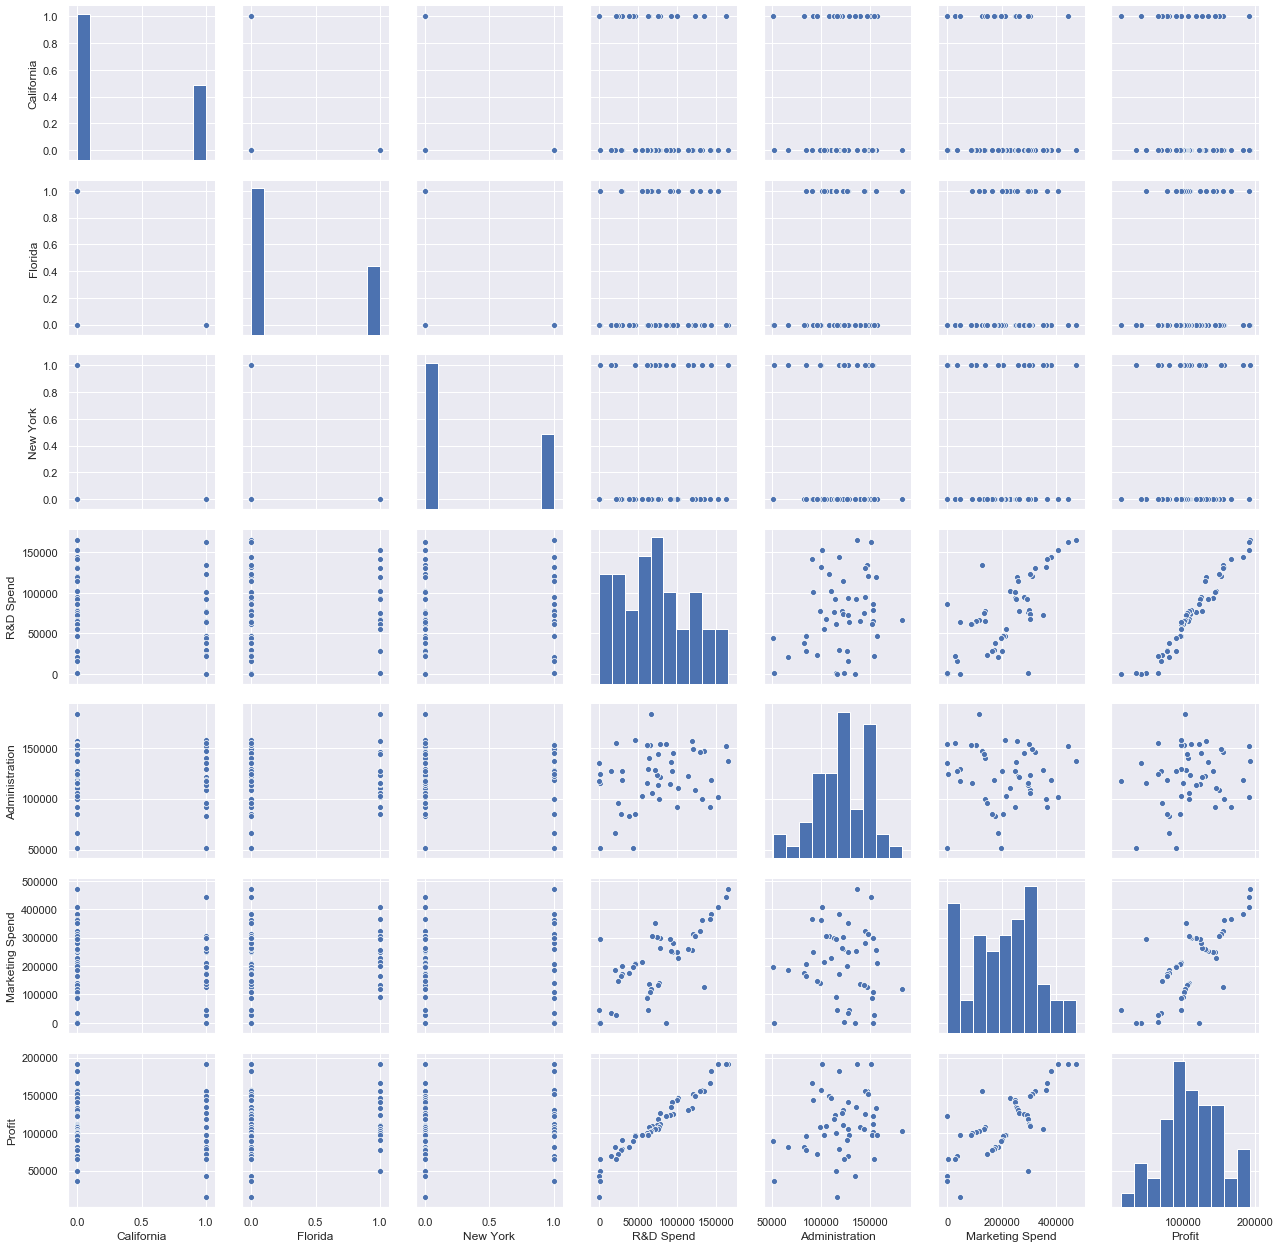

In [29]:
sns.pairplot(startups_data_comb)
plt.show()

In [35]:
startups_data_comb.corr()

,California,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
California,1.000000,-0.492366,-0.515152,-0.143165,-0.015478,-0.168875,-0.145837
Florida,-0.492366,1.000000,-0.492366,0.105711,0.010493,0.205685,0.116244
New York,-0.515152,-0.492366,1.000000,0.039068,0.005145,-0.033670,0.031368
R&D Spend,-0.143165,0.105711,0.039068,1.000000,0.241955,0.724248,0.972900
Administration,-0.015478,0.010493,0.005145,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,-0.168875,0.205685,-0.033670,0.724248,-0.032154,1.000000,0.747766
Profit,-0.145837,0.116244,0.031368,0.972900,0.200717,0.747766,1.000000


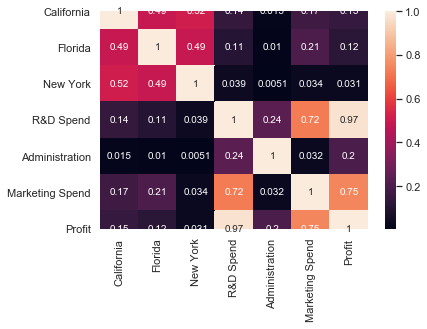

In [39]:
corrMatrix = startups_data_comb.corr().abs()
sns.heatmap(corrMatrix,annot=True)
plt.show()

In [57]:
startups_data_comb.columns = startups_data_comb.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('&','_')
startups_data_comb.head()

,california,florida,new_york,r_d_spend,administration,marketing_spend,profit
0,0,0,1,165349.20,136897.80,471784.10,192261.83
1,1,0,0,162597.70,151377.59,443898.53,191792.06
2,0,1,0,153441.51,101145.55,407934.54,191050.39
3,0,0,1,144372.41,118671.85,383199.62,182901.99
4,0,1,0,142107.34,91391.77,366168.42,166187.94


In [58]:
startups_data_comb.columns

Index(['california', 'florida', 'new_york', 'r_d_spend', 'administration',
       'marketing_spend', 'profit'],
      dtype='object')

In [105]:
ml1 = smf.ols('profit~administration+marketing_spend+r_d_spend',data=startups_data_comb).fit()
ml1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 12 May 2020   Prob (F-statistic):           4.53e-30
Time:                        02:29:42   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
marketing_spend     0.0272      0.016      1.655      0.105      -0.006       0.060
r_d_spend           0.8057      0.045     17.846      0.000       0.715       0.897
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [106]:
ml1_pred=ml1.predict(startups_data_comb)
startups_data_comb = startups_data_comb[['r_d_spend', 'administration',
       'marketing_spend', 'profit']]
startups_data_comb.insert(loc=4, column = 'Predicted', value=ml1_pred)
startups_data_comb.insert(loc=5, column = 'Residuals', value=ml1.resid)
startups_data_comb.head()

,r_d_spend,administration,marketing_spend,profit,Predicted,Residuals
0,165349.20,136897.80,471784.10,192261.83,192521.252890,-259.422890
1,162597.70,151377.59,443898.53,191792.06,189156.768232,2635.291768
2,153441.51,101145.55,407934.54,191050.39,182147.279096,8903.110904
3,144372.41,118671.85,383199.62,182901.99,173696.700026,9205.289974
4,142107.34,91391.77,366168.42,166187.94,172139.514183,-5951.574183


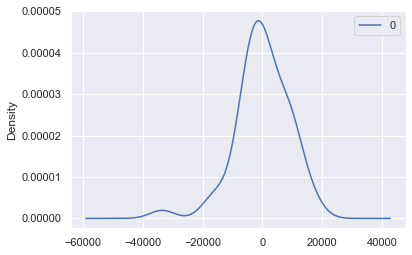

In [107]:
df = pd.DataFrame(ml1.resid)
df.plot.density()
plt.show()

### Calculating VIF values of independent variables

In [108]:
startups_data_comb.columns

Index(['r_d_spend', 'administration', 'marketing_spend', 'profit', 'Predicted',
       'Residuals'],
      dtype='object')

In [109]:
rsq_r_d = smf.ols('r_d_spend~administration+marketing_spend',data=startups_data_comb).fit().rsquared
r_d_vif = 1/(1-rsq_r_d)

rsq_ad = smf.ols('administration~r_d_spend+marketing_spend',data=startups_data_comb).fit().rsquared
ad_vif = 1/(1-rsq_ad)

rsq_mk = smf.ols('marketing_spend~administration+r_d_spend',data=startups_data_comb).fit().rsquared
mk_vif = 1/(1-rsq_mk)

d1 = {'Variables':['r_d','ad','mk'],'VIF':[r_d_vif,rsq_ad,rsq_mk]}
vif_frame = pd.DataFrame(d1)
vif_frame

,Variables,VIF
0,r_d,2.468903
1,ad,0.149002
2,mk,0.570220


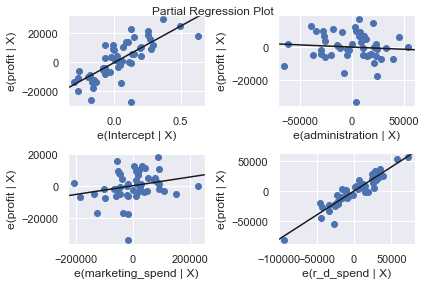

In [110]:
sm.graphics.plot_partregress_grid(ml1)
plt.show()

In [112]:
from sklearn.model_selection import train_test_split

startups_train, startups_test = train_test_split(startups_data_comb, test_size = 0.2)

model_train = smf.ols('profit~administration+marketing_spend+r_d_spend',data=startups_train).fit()

train_pred = model_train.predict(startups_train)

train_resid  = train_pred - startups_train.profit

startups_train.head()

,r_d_spend,administration,marketing_spend,profit,Predicted,Residuals
38,20229.59,65947.93,185265.10,81229.06,69697.430648,11531.629352
25,64664.71,139553.16,137962.62,107404.34,102237.725065,5166.614935
24,77044.01,99281.34,140574.81,108552.04,113362.966113,-4810.926113
46,1315.46,115816.21,297114.46,49490.75,56166.206853,-6675.456853
40,28754.33,118546.05,172795.67,78239.91,74815.953991,3423.956009


In [113]:
train_rmse = np.sqrt(np.mean(train_resid*train_resid))
train_rmse

7456.207491317336

In [115]:
test_pred = model_train.predict(startups_test)

# test residual values 
test_resid  = test_pred - startups_test.profit

# RMSE value for test data 
test_rmse = np.sqrt(np.mean(test_resid*test_resid))
test_rmse

13386.277995727969